In [1]:
import pandas as pd

PATH_DATA = "/Users/mariehumbertdroz/Documents/ai_tools/legacy-challenge/data/"

In [2]:
df1 = pd.read_csv(PATH_DATA + "500_Reddit_users_posts_labels.csv")
df1.head()

,User,Post,Label
0,user-0,"['Its not a viable option, and youll be leavin...",Supportive
1,user-1,['It can be hard to appreciate the notion that...,Ideation
2,user-2,"['Hi, so last night i was sitting on the ledge...",Behavior
3,user-3,['I tried to kill my self once and failed badl...,Attempt
4,user-4,['Hi NEM3030. What sorts of things do you enjo...,Ideation


In [3]:
df1.User.nunique()

500

In [4]:
df1.Label.value_counts()

Label
Ideation      171
Supportive    108
Indicator      99
Behavior       77
Attempt        45
Name: count, dtype: int64

In [5]:
df1['Post'][0]
# Need to remove these extra '[' and ']'

"['Its not a viable option, and youll be leaving your wife behind. Youd Pain her beyond comprehension.It sucks worrying about money, I know that first hand. It can definitely feel hopeless, as you seem to be Tired aware of. Your wife might need to chip in financially. I know time is an issue, but even 10-15 hours a Asthenia could alleviate a lot of the pressure. In the meantime, get your shit together - write that resume tomorrow. No excuses, get it done and send it out. Whether you believe in some sort of powerful being or force governing things or not, things really do work themselves out. This is a big test for you, and youll pull through. Just try to stay as positive as you can and everything will work out.']"

In [6]:
# What are the other files
df2 = pd.read_csv(PATH_DATA + "suicidal_attempt.csv")
df2.head()
# Looks like a list of terms. Maybe a specific terminology

,Suicidal deliberate poisoning,Suicide by self-administered drug,Suicide while incarcerated,Assisted Suicide,Suicide attempt by adequate means,Suicide attempt by inadequate means,Suicide suspected,Suicide by multiple means,Self-inflicted poisoning by solid and liquid substances,Suicide and self-inflicted poisoning by analgesics,...,Made a suicide attempt,Shooting,Set myself on fire,Blew myself up,Went out in the cold,Went in the freezer,Jumped from bridge,Jumped from roof.1,Bag around head,Belt around neck


# Prepare data for training

In [7]:
def clean_text(text):
    text = text.lower()
    text = text.replace("\n", " ")
    text = text.replace("[", "")
    text = text.replace("]", "")
    text = text.replace("'", "")
    text = " ".join(text.split())
    return text

In [8]:
print(clean_text(df1['Post'][0]))

its not a viable option, and youll be leaving your wife behind. youd pain her beyond comprehension.it sucks worrying about money, i know that first hand. it can definitely feel hopeless, as you seem to be tired aware of. your wife might need to chip in financially. i know time is an issue, but even 10-15 hours a asthenia could alleviate a lot of the pressure. in the meantime, get your shit together - write that resume tomorrow. no excuses, get it done and send it out. whether you believe in some sort of powerful being or force governing things or not, things really do work themselves out. this is a big test for you, and youll pull through. just try to stay as positive as you can and everything will work out.


In [9]:
df1['clean_text'] = df1['Post'].apply(lambda x: clean_text(x))
df1

,User,Post,Label,clean_text
0,user-0,"['Its not a viable option, and youll be leavin...",Supportive,"its not a viable option, and youll be leaving ..."
1,user-1,['It can be hard to appreciate the notion that...,Ideation,it can be hard to appreciate the notion that y...
2,user-2,"['Hi, so last night i was sitting on the ledge...",Behavior,"hi, so last night i was sitting on the ledge o..."
3,user-3,['I tried to kill my self once and failed badl...,Attempt,i tried to kill my self once and failed badly ...
4,user-4,['Hi NEM3030. What sorts of things do you enjo...,Ideation,hi nem3030. what sorts of things do you enjoy ...
...,...,...,...,...
495,user-495,"['Its not the end, it just feels that way. Or ...",Supportive,"its not the end, it just feels that way. or at..."
496,user-496,"['It was a skype call, but she ended it and Ve...",Indicator,"it was a skype call, but she ended it and vent..."
497,user-497,['That sounds really weird.Maybe you were Dist...,Supportive,that sounds really weird.maybe you were distra...
498,user-498,['Dont know there as dumb as it sounds I feel ...,Attempt,dont know there as dumb as it sounds i feel hy...


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

train_data, tmp_data = train_test_split(
    df1,
    test_size=0.3,
    random_state=123,
    stratify=df1['Label']
)

In [11]:
train_data.Label.value_counts()

Label
Ideation      120
Supportive     76
Indicator      69
Behavior       54
Attempt        31
Name: count, dtype: int64

In [12]:
val_data, test_data = train_test_split(
    tmp_data,
    test_size=0.5,
    random_state=123
)

In [13]:
val_data.Label.value_counts()

Label
Ideation      24
Behavior      17
Supportive    16
Indicator     11
Attempt        7
Name: count, dtype: int64

In [14]:
test_data.Label.value_counts()

Label
Ideation      27
Indicator     19
Supportive    16
Attempt        7
Behavior       6
Name: count, dtype: int64

In [15]:
# The classes are highly imbalanced, we need to account for that
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=train_data.Label.unique(),
    y=train_data['Label']
)

In [16]:
class_weights

array([1.01449275, 0.58333333, 1.2962963 , 2.25806452, 0.92105263])

In [17]:
class_weight_dict = dict(zip(train_data.Label.unique(), class_weights))
class_weight_dict

{'Indicator': np.float64(1.0144927536231885),
 'Ideation': np.float64(0.5833333333333334),
 'Behavior': np.float64(1.2962962962962963),
 'Attempt': np.float64(2.2580645161290325),
 'Supportive': np.float64(0.9210526315789473)}

In [18]:
# Which model to choose? 
# "mental/mental-bert-base-uncased" bert trained on reddit mental health posts and suicide watch

In [19]:
from transformers import AutoTokenizer
# Prepare data for transformer model
tokenizer = AutoTokenizer.from_pretrained('mental/mental-bert-base-uncased')

/opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
import torch

label_map = {
        "Supportive": 0,
        "Indicator": 1,
        "Ideation": 2,
        "Behavior": 3,
        "Attempt": 4
    }

train_data['label'] = train_data['Label'].map(label_map)
val_data['label'] = val_data['Label'].map(label_map)
test_data['label'] = test_data['Label'].map(label_map)

In [25]:
train_data.head()

,User,Post,Label,clean_text,label
356,user-356,['Damn that hit home for me for sure. Im in th...,Indicator,damn that hit home for me for sure. im in the ...,1
189,user-189,"['Why?', 'Idk. Weve been talking. She says she...",Indicator,"why?, idk. weve been talking. she says she doe...",1
273,user-273,['That drives me crazy. The text goodbye was c...,Ideation,that drives me crazy. the text goodbye was cle...,2
81,user-81,['So should I bank on the slight chance that i...,Ideation,so should i bank on the slight chance that it ...,2
52,user-52,['I feel exactly the same way as youve describ...,Ideation,i feel exactly the same way as youve described...,2


In [28]:
# convert to huggingface dataset
from datasets import Dataset

train_dataset = Dataset.from_pandas(train_data[['User', 'clean_text', 'label']])
val_dataset = Dataset.from_pandas(val_data[['User', 'clean_text', 'label']])
test_dataset = Dataset.from_pandas(test_data[['User', 'clean_text', 'label']])

In [29]:
from transformers import AutoTokenizer
# tokenize
model_name = "mental/mental-bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize(example):
    return tokenizer(
        example['clean_text'], 
        padding="max_length",
        truncation=True,
        max_length=512
        )

train_dataset = train_dataset.map(tokenize, batched=True)
val_dataset = val_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

# remove clean_text to avoid passing raw strings
cols_to_remove = ['clean_text']
train_dataset = train_dataset.remove_columns(cols_to_remove).with_format("torch")
val_dataset = val_dataset.remove_columns(cols_to_remove).with_format("torch")
test_dataset = test_dataset.remove_columns(cols_to_remove).with_format("torch")

Map: 100%|██████████| 75/75 [00:00<00:00, 2343.52 examples/s]


In [30]:
train_dataset

Dataset({
    features: ['User', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 350
})

In [31]:
id2label = {v: k for k, v in label_map.items()}
id2label

{0: 'Supportive', 1: 'Indicator', 2: 'Ideation', 3: 'Behavior', 4: 'Attempt'}

In [32]:
# Load model
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=5,
    id2label=id2label,
    label2id=label_map,
    use_auth_token=True
)

/opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/transformers/models/auto/auto_factory.py:471: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at mental/mental-bert-base-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
# TRain
from transformers import TrainingArguments, Trainer
from sklearn.metrics import classification_report, accuracy_score, f1_score
import numpy as np

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)

    return {
        "accuracy": accuracy_score(labels, preds),# TODO: Remove accuracy and put precision and recall
        "f1_macro": f1_score(labels, preds, average='macro')
    }

In [37]:
training_args = TrainingArguments(
    output_dir="./mentalbert-checkpoints",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
)

/opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [38]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()

/var/folders/g9/9k12db2n5jg43my6h8cxjsn00000gn/T/ipykernel_66485/2133766414.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(

/opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)






















                                               
                                          

 33%|███▎      | 22/66 [05:22<00:56,  1.28s/it]


{'loss': 1.3527, 'grad_norm': 7.0979413986206055, 'learning_rate': 1.3333333333333333e-05, 'epoch': 1.0}








                                               
                                          

                                         


 33%|███▎      | 22/66 [05:24<00:56,  1.28s/it]






{'eval_loss': 1.4392616748809814, 'eval_accuracy': 0.38666666666666666, 'eval_f1_macro': 0.27209162145871, 'eval_runtime': 1.8496, 'eval_samples_per_second': 40.549, 'eval_steps_per_second': 1.622, 'epoch': 1.0}


/opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)






















                                               
                                          

 33%|███▎      | 22/66 [05:53<00:56,  1.28s/it]


{'loss': 1.2441, 'grad_norm': 5.057394027709961, 'learning_rate': 6.666666666666667e-06, 'epoch': 2.0}








                                               
                                          

                                         


 33%|███▎      | 22/66 [05:55<00:56,  1.28s/it]






{'eval_loss': 1.4163787364959717, 'eval_accuracy': 0.37333333333333335, 'eval_f1_macro': 0.23264033264033265, 'eval_runtime': 1.7945, 'eval_samples_per_second': 41.795, 'eval_steps_per_second': 1.672, 'epoch': 2.0}


/opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)






















                                               
                                          

 33%|███▎      | 22/66 [06:26<00:56,  1.28s/it]
/opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'loss': 1.1702, 'grad_norm': 6.977882385253906, 'learning_rate': 0.0, 'epoch': 3.0}








                                               
                                          

                                         


 33%|███▎      | 22/66 [06:28<00:56,  1.28s/it]






{'eval_loss': 1.4239333868026733, 'eval_accuracy': 0.37333333333333335, 'eval_f1_macro': 0.2300762300762301, 'eval_runtime': 1.9278, 'eval_samples_per_second': 38.904, 'eval_steps_per_second': 1.556, 'epoch': 3.0}


                                               
                                          

100%|██████████| 66/66 [01:34<00:00,  1.43s/it]

{'train_runtime': 94.6607, 'train_samples_per_second': 11.092, 'train_steps_per_second': 0.697, 'train_loss': 1.2556769053141277, 'epoch': 3.0}


TrainOutput(global_step=66, training_loss=1.2556769053141277, metrics={'train_runtime': 94.6607, 'train_samples_per_second': 11.092, 'train_steps_per_second': 0.697, 'total_flos': 276274049587200.0, 'train_loss': 1.2556769053141277, 'epoch': 3.0})

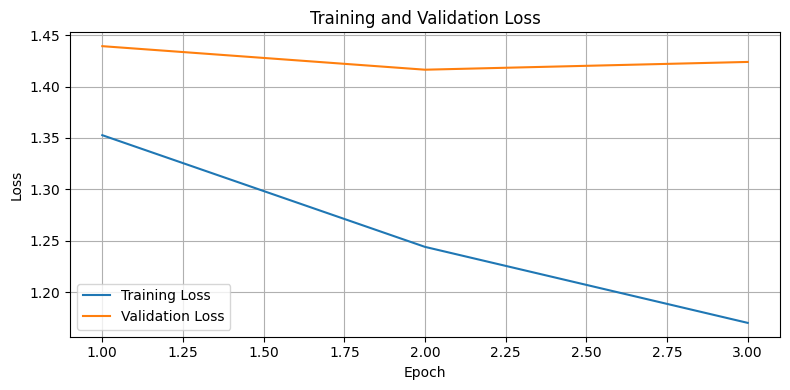

In [39]:
import matplotlib.pyplot as plt

# Get log history (training + eval losses)
logs = trainer.state.log_history

train_loss = [x["loss"] for x in logs if "loss" in x and "eval_loss" not in x]
eval_loss = [x["eval_loss"] for x in logs if "eval_loss" in x]

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, eval_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
preds = trainer.predict(test_dataset)
print("Test set metrics:", compute_metrics(preds))

y_true = preds.label_ids
y_pred = np.argmax(preds.predictions, axis=1)
print(classification_report(y_true, y_pred, target_names=[id2label[i] for i in range(5)]))


/opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)



100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

Test set metrics: {'accuracy': 0.48, 'f1_macro': 0.24991974317817017}
              precision    recall  f1-score   support

  Supportive       0.75      0.56      0.64        16
   Indicator       0.00      0.00      0.00        19
    Ideation       0.44      1.00      0.61        27
    Behavior       0.00      0.00      0.00         6
     Attempt       0.00      0.00      0.00         7

    accuracy                           0.48        75
   macro avg       0.24      0.31      0.25        75
weighted avg       0.32      0.48      0.36        75




/opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
# try adding class weights
import torch
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_names = np.array(sorted(train_data["label"].unique()))

class_names

array([0, 1, 2, 3, 4])

In [50]:
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=class_names,
    y=train_data["label"].values
)
class_weights = torch.tensor(class_weights, dtype=torch.float)

In [54]:
# custom trainer
from transformers import Trainer

class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights.to(model.device))
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss


In [55]:
trainer = WeightedLossTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)


/var/folders/g9/9k12db2n5jg43my6h8cxjsn00000gn/T/ipykernel_66485/2895387525.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedLossTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedLossTrainer(


In [56]:
trainer.train()

/opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)

  0%|          | 0/66 [01:39<?, ?it/s]         

{'loss': 1.2009, 'grad_norm': 9.410639762878418, 'learning_rate': 1.3333333333333333e-05, 'epoch': 1.0}







                                       
                                               
  0%|          | 0/66 [01:41<?, ?it/s]


{'eval_loss': 1.468384861946106, 'eval_accuracy': 0.38666666666666666, 'eval_f1_macro': 0.32024094904419453, 'eval_runtime': 2.0396, 'eval_samples_per_second': 36.772, 'eval_steps_per_second': 1.471, 'epoch': 1.0}


/opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)

  0%|          | 0/66 [02:10<?, ?it/s]         

{'loss': 1.1597, 'grad_norm': 7.500240802764893, 'learning_rate': 6.666666666666667e-06, 'epoch': 2.0}







                                       
                                               
  0%|          | 0/66 [02:12<?, ?it/s]


{'eval_loss': 1.476595401763916, 'eval_accuracy': 0.37333333333333335, 'eval_f1_macro': 0.30351359167148645, 'eval_runtime': 1.8133, 'eval_samples_per_second': 41.36, 'eval_steps_per_second': 1.654, 'epoch': 2.0}


/opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)

  0%|          | 0/66 [02:43<?, ?it/s]         /opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'loss': 1.0734, 'grad_norm': 8.2236967086792, 'learning_rate': 0.0, 'epoch': 3.0}







                                       
                                               
  0%|          | 0/66 [02:45<?, ?it/s]


{'eval_loss': 1.4735721349716187, 'eval_accuracy': 0.36, 'eval_f1_macro': 0.29684981684981687, 'eval_runtime': 1.9358, 'eval_samples_per_second': 38.744, 'eval_steps_per_second': 1.55, 'epoch': 3.0}



100%|██████████| 66/66 [01:35<00:00,  1.45s/it]

{'train_runtime': 95.8369, 'train_samples_per_second': 10.956, 'train_steps_per_second': 0.689, 'train_loss': 1.1446466445922852, 'epoch': 3.0}


TrainOutput(global_step=66, training_loss=1.1446466445922852, metrics={'train_runtime': 95.8369, 'train_samples_per_second': 10.956, 'train_steps_per_second': 0.689, 'total_flos': 276274049587200.0, 'train_loss': 1.1446466445922852, 'epoch': 3.0})

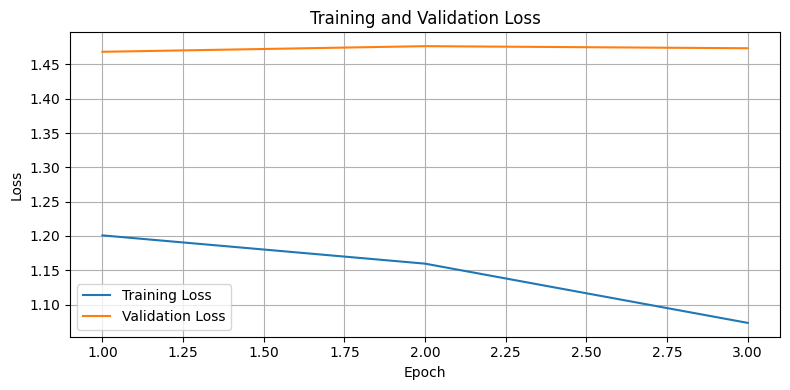

In [57]:
import matplotlib.pyplot as plt

# Get log history (training + eval losses)
logs = trainer.state.log_history

train_loss = [x["loss"] for x in logs if "loss" in x and "eval_loss" not in x]
eval_loss = [x["eval_loss"] for x in logs if "eval_loss" in x]

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, eval_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [58]:
preds = trainer.predict(test_dataset)
print("Test set metrics:", compute_metrics(preds))

y_true = preds.label_ids
y_pred = np.argmax(preds.predictions, axis=1)
print(classification_report(y_true, y_pred, target_names=[id2label[i] for i in range(5)]))


/opt/anaconda3/envs/ml_dev/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

Test set metrics: {'accuracy': 0.26666666666666666, 'f1_macro': 0.24884754884754887}
              precision    recall  f1-score   support

  Supportive       0.75      0.56      0.64        16
   Indicator       0.33      0.32      0.32        19
    Ideation       0.50      0.11      0.18        27
    Behavior       0.06      0.33      0.10         6
     Attempt       0.00      0.00      0.00         7

    accuracy                           0.27        75
   macro avg       0.33      0.26      0.25        75
weighted avg       0.43      0.27      0.29        75



In [60]:
output_dir = "./mentalbert-v1"

trainer.save_model(output_dir)                # Saves model + config
tokenizer.save_pretrained(output_dir)         # Saves tokenizer vocab + special tokens


('./mentalbert-v1/tokenizer_config.json',
 './mentalbert-v1/special_tokens_map.json',
 './mentalbert-v1/vocab.txt',
 './mentalbert-v1/added_tokens.json',
 './mentalbert-v1/tokenizer.json')

In [61]:
label_map

{'Supportive': 0, 'Indicator': 1, 'Ideation': 2, 'Behavior': 3, 'Attempt': 4}

In [ ]:
# TODO: Try a second method, maybe oversampling? Maybe after we build the full thing